In [703]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math
import os
from sklearn.metrics import mean_squared_error

In [704]:
# Une fonction pour detecter le visage dans une image donnée en entrée
def getFace(img):
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(img, 1.4, 4)
    for (x, y, w, h) in faces:
        faces = img[y:y + h, x:x + w]
        cv2.imwrite('Images/face.jpg', faces)
    face = cv2.imread('Images/face.jpg',0)
    face = cv2.resize(face,(128,128),interpolation = cv2.INTER_AREA)
    os.remove('Images/face.jpg')
    return face


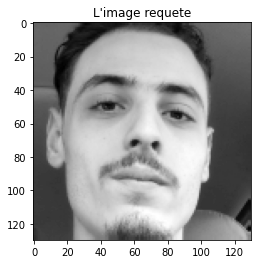

In [705]:
# On lit l'image requete et on detect le visage
img_path = 'Images/1.jpg'
img = cv2.imread(img_path,0)
plt.imshow(img,cmap='gray')
img = getFace(img)
h,w = img.shape[:2]
img = cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_REFLECT)
height,width = img.shape[:2]
plt.title("L'image requete")
plt.imshow(img,cmap='gray')

Text(0.5, 1.0, 'img8')

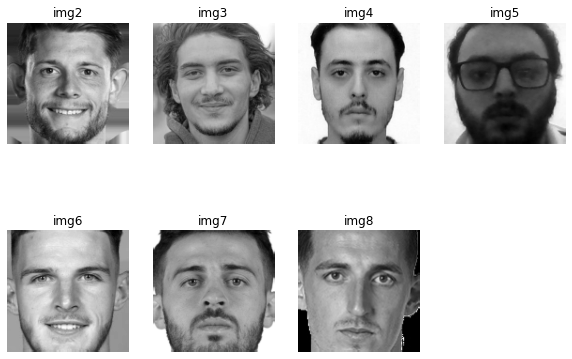

In [706]:
# On lit les images pour trouver la plus similaire a l'image requete
# Pour chaque Image,on detect le visage et on duplique les bordures
fig = plt.figure(figsize=(10, 7))
rows = 2
cols = 4

img_path = 'Images/2.jpg'
img2 = cv2.imread(img_path,0)
img2 = getFace(img2)
img2 = cv2.copyMakeBorder(img2,1,1,1,1,cv2.BORDER_REFLECT)
fig.add_subplot(rows, cols, 1)
plt.imshow(img2,cmap='gray')
plt.axis('off')
plt.title("img2")

img_path = 'Images/3.jpg'
img3 = cv2.imread(img_path,0)
img3 = getFace(img3)
img3 = cv2.copyMakeBorder(img3,1,1,1,1,cv2.BORDER_REFLECT)
fig.add_subplot(rows, cols, 2)
plt.imshow(img3,cmap='gray')
plt.axis('off')
plt.title("img3")

img_path = 'Images/4.jpg'
img4 = cv2.imread(img_path,0)
img4 = getFace(img4)
img4 = cv2.copyMakeBorder(img4,1,1,1,1,cv2.BORDER_REFLECT)
fig.add_subplot(rows, cols, 3)
plt.imshow(img4,cmap='gray')
plt.axis('off')
plt.title("img4")

img_path = 'Images/5.jpg'
img5 = cv2.imread(img_path,0)
img5 = getFace(img5)
img5 = cv2.copyMakeBorder(img5,1,1,1,1,cv2.BORDER_REFLECT)
fig.add_subplot(rows, cols, 4)
plt.imshow(img5,cmap='gray')
plt.axis('off')
plt.title("img5")

img_path = 'Images/6.jpg'
img6 = cv2.imread(img_path,0)
img6 = getFace(img6)
img6 = cv2.copyMakeBorder(img6,1,1,1,1,cv2.BORDER_REFLECT)
fig.add_subplot(rows, cols, 5)
plt.imshow(img6,cmap='gray')
plt.axis('off')
plt.title("img6")

img_path = 'Images/7.jpg'
img7 = cv2.imread(img_path,0)
img7 = getFace(img7)
img7 = cv2.copyMakeBorder(img7,1,1,1,1,cv2.BORDER_REFLECT)
fig.add_subplot(rows, cols, 6)
plt.imshow(img7,cmap='gray')
plt.axis('off')
plt.title("img7")

img_path = 'Images/8.jpg'
img8 = cv2.imread(img_path,0)
img8 = getFace(img8)
img8 = cv2.copyMakeBorder(img8,1,1,1,1,cv2.BORDER_REFLECT)
fig.add_subplot(rows, cols, 7)
plt.imshow(img8,cmap='gray')
plt.axis('off')
plt.title("img8")

In [707]:
#Fonction qui applique LBP pour un seul pixel
def lbp(M,i_ref,j_ref):
    ref_value = M[i_ref][j_ref]
    bin_val = ""
    #0
    if M[i_ref-1][j_ref-1] >= ref_value :
        bin_val += "1"
    else :
        bin_val += "0"
    #1
    if M[i_ref-1][j_ref] >= ref_value :
        bin_val += "1"
    else :
        bin_val += "0"
    #2
    if M[i_ref-1][j_ref+1] >= ref_value :
        bin_val += "1"
    else :
        bin_val += "0"
    #3
    if M[i_ref][j_ref+1] >= ref_value :
        bin_val += "1"
    else :
        bin_val += "0"
    #4
    if M[i_ref+1][j_ref+1] >= ref_value :
        bin_val += "1"
    else :
        bin_val += "0"
    #5
    if M[i_ref+1][j_ref] >= ref_value :
        bin_val += "1"
    else :
        bin_val += "0"
    #6
    if M[i_ref+1][j_ref-1] >= ref_value :
        bin_val += "1"
    else :
        bin_val += "0"
    #7 
    if M[i_ref][j_ref-1] >= ref_value :
        bin_val += "1"
    else :
        bin_val += "0"
    dec_val = int(bin_val,2) 
    #print(dec_val)
    return dec_val

#Fonction qui applique LBP pour toute l'image
def imageToLbp(img,h,w,height,width):
    img_lbp = np.zeros((h,w))
    for i in range(1,height-1):
        for j in range(1,width-1):
            img_lbp[i-1][j-1] = lbp(img,i,j)
    return img_lbp

Text(0.5, 1.0, 'img8')

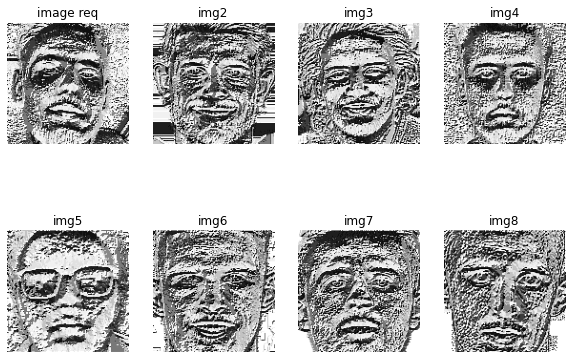

In [708]:
# On applique LBP pour tous les images
fig = plt.figure(figsize=(10, 7))
rows = 2
cols = 4

img_lbp = imageToLbp(img,h,w,height,width)
fig.add_subplot(rows, cols, 1)
plt.imshow(img_lbp,cmap='gray')
plt.axis('off')
plt.title("image req")

img_lbp2 = imageToLbp(img2,h,w,height,width)
fig.add_subplot(rows, cols, 2)
plt.imshow(img_lbp2,cmap='gray')
plt.axis('off')
plt.title("img2")

img_lbp3 = imageToLbp(img3,h,w,height,width)
fig.add_subplot(rows, cols, 3)
plt.imshow(img_lbp3,cmap='gray')
plt.axis('off')
plt.title("img3")

img_lbp4 = imageToLbp(img4,h,w,height,width)
fig.add_subplot(rows, cols, 4)
plt.imshow(img_lbp4,cmap='gray')
plt.axis('off')
plt.title("img4")

img_lbp5 = imageToLbp(img5,h,w,height,width)
fig.add_subplot(rows, cols, 5)
plt.imshow(img_lbp5,cmap='gray')
plt.axis('off')
plt.title("img5")

img_lbp6 = imageToLbp(img6,h,w,height,width)
fig.add_subplot(rows, cols, 6)
plt.imshow(img_lbp6,cmap='gray')
plt.axis('off')
plt.title("img6")

img_lbp7 = imageToLbp(img7,h,w,height,width)
fig.add_subplot(rows, cols, 7)
plt.imshow(img_lbp7,cmap='gray')
plt.axis('off')
plt.title("img7")

img_lbp8 = imageToLbp(img8,h,w,height,width)
fig.add_subplot(rows, cols, 8)
plt.imshow(img_lbp8,cmap='gray')
plt.axis('off')
plt.title("img8")

In [709]:
# Une fonction qui va couper l'image en entree vers des regions de taille bloc_size_r*bloc_size_c
def create_regions(test_image,bloc_size_r,bloc_size_c):
    regions = []
    for r in range(0,test_image.shape[0], bloc_size_r):
        for c in range(0,test_image.shape[1], bloc_size_c):
            window = test_image[r:r+bloc_size_r,c:c+bloc_size_c]
            regions.append(window)
    return np.array(regions)


In [710]:
# On cree des regions pour tous les images
bloc_size_r = 8
bloc_size_c = 8

regions = []
regions = create_regions(img_lbp,bloc_size_c,bloc_size_r)
print(regions)

regions2 = []
regions2 = create_regions(img_lbp2,bloc_size_c,bloc_size_r)
print(regions2)

regions3 = []
regions3 = create_regions(img_lbp3,bloc_size_c,bloc_size_r)
print(regions3)

regions4 = []
regions4 = create_regions(img_lbp4,bloc_size_c,bloc_size_r)
print(regions4)

regions5 = []
regions5 = create_regions(img_lbp5,bloc_size_c,bloc_size_r)
print(regions5)

regions6 = []
regions6 = create_regions(img_lbp6,bloc_size_c,bloc_size_r)
print(regions6)

regions7 = []
regions7 = create_regions(img_lbp7,bloc_size_c,bloc_size_r)
print(regions7)

regions8 = []
regions8 = create_regions(img_lbp8,bloc_size_c,bloc_size_r)
print(regions8)



[[[201. 255. 126. ... 255. 247. 251.]
  [255.  30.  23. ...  15. 239. 255.]
  [ 15. 127. 239. ... 223.  30.  15.]
  ...
  [ 49.  65. 247. ... 255. 247. 240.]
  [255. 255. 239. ... 255. 239. 255.]
  [249.  16.  17. ... 253. 223. 191.]]

 [[253. 112. 193. ... 249. 116. 251.]
  [254. 255. 222. ... 255. 100. 251.]
  [ 31.  63.  30. ...  63.  76. 255.]
  ...
  [249. 253. 231. ... 184.  69. 255.]
  [254. 240. 193. ... 251. 192. 247.]
  [127. 255. 223. ... 255. 240. 225.]]

 [[197. 251. 112. ... 193. 195. 193.]
  [200. 255. 254. ... 195. 227. 227.]
  [214. 128. 113. ... 199. 199. 195.]
  ...
  [  0. 227. 195. ... 225. 241. 192.]
  [227. 195. 195. ... 241. 248. 252.]
  [227. 195. 199. ... 255. 252.  48.]]

 ...

 [[127. 126.  60. ...  28.  26.  28.]
  [ 28.  62.  62. ...  36. 127. 124.]
  [ 62.  28.  42. ...  72. 255.  60.]
  ...
  [127. 122. 124. ... 125. 255. 250.]
  [ 47. 127.  60. ...  28.  12. 127.]
  [223.  60.   4. ...  60.  28.  60.]]

 [[ 60.  24.  13. ...  56. 120. 221.]
  [ 56. 124.

In [711]:
# pour chaque regions donnee en entree on cree son descripteur
def get_desc(regions):
    descriptor = []
    hist = []
    for r in regions :
        temp = r.ravel().tolist()
        # print(temp)
        for i in range(256):
            hist.append(temp.count(i))
    descriptor.extend(hist)
    return descriptor

In [712]:
descriptor = get_desc(regions)
# print(descriptor)
descriptor2 = get_desc(regions2)
# print(descriptor2)
descriptor3 = get_desc(regions3)
# print(descriptor3)
descriptor4 = get_desc(regions4)
# print(descriptor4)
descriptor5 = get_desc(regions5)
# print(descriptor5)
descriptor6 = get_desc(regions6)
# print(descriptor6)
descriptor7 = get_desc(regions7)
# print(descriptor7)
descriptor8 = get_desc(regions8)
# print(descriptor8)

La difference de similarite entre l'image requete et image 2 = 2.229644775390625
La difference de similarite entre l'image requete et image 3 = 1.91241455078125
La difference de similarite entre l'image requete et image 4 = 1.55889892578125
La difference de similarite entre l'image requete et image 5 = 2.452667236328125
La difference de similarite entre l'image requete et image 6 = 2.13140869140625
La difference de similarite entre l'image requete et image 7 = 2.055816650390625
La difference de similarite entre l'image requete et image 8 = 2.29339599609375
Le min est = 1.55889892578125


Text(0.5, 1.0, "L'image la plus similaire")

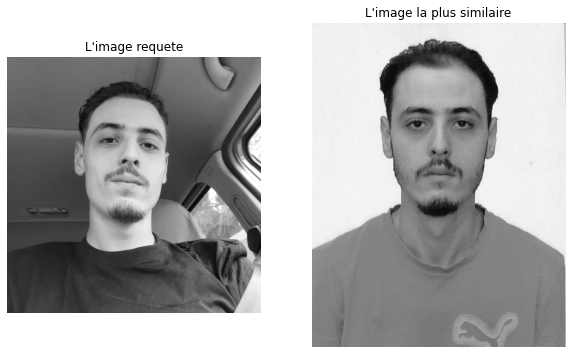

In [713]:
# Les calculs de tous les MSE entre l'image requete et les autres,on trouve le min et on affiche l'image la plus similaire a la fin
fig = plt.figure(figsize=(10, 7))
rows = 1
cols = 2

MSE = []
MSE.append(math.inf)
mse_1 = mean_squared_error(descriptor,descriptor2)
MSE.append(mse_1)
mse_2 = mean_squared_error(descriptor,descriptor3)
MSE.append(mse_2)
mse_3 = mean_squared_error(descriptor,descriptor4)
MSE.append(mse_3)
mse_4 = mean_squared_error(descriptor,descriptor5)
MSE.append(mse_4)
mse_5 = mean_squared_error(descriptor,descriptor6)
MSE.append(mse_5)
mse_6 = mean_squared_error(descriptor,descriptor7)
MSE.append(mse_6)
mse_7 = mean_squared_error(descriptor,descriptor8)
MSE.append(mse_7)

print( "La difference de similarite entre l'image requete et image 2 = " + str(mse_1))
print( "La difference de similarite entre l'image requete et image 3 = " + str(mse_2))
print( "La difference de similarite entre l'image requete et image 4 = " + str(mse_3))
print( "La difference de similarite entre l'image requete et image 5 = " + str(mse_4))
print( "La difference de similarite entre l'image requete et image 6 = " + str(mse_5))
print( "La difference de similarite entre l'image requete et image 7 = " + str(mse_6))
print( "La difference de similarite entre l'image requete et image 8 = " + str(mse_7))

print("Le min est = " + str(min(MSE)))
minIndex = MSE.index(min(MSE))

img_path = 'Images/1.jpg'
img = cv2.imread(img_path,0)
fig.add_subplot(rows, cols, 1)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title("L'image requete")

img_path = 'Images/'+str(minIndex+1)+'.jpg'
fig.add_subplot(rows, cols, 2)
imgSim = cv2.imread(img_path,0)
plt.imshow(imgSim,cmap='gray')
plt.axis('off')
plt.title("L'image la plus similaire")